In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [24]:
cov = pd.read_csv('results/technology/cov_clean.csv', usecols=[1, 2, 3])
corr = pd.read_csv('results/technology/corr_clean.csv', usecols=[1, 2, 3])
cooccur = pd.read_csv('results/technology/cooccur_clean.csv', usecols=[1, 2, 3])

In [25]:
# Force value column from string (as read in by read_csv) to float
cov['value'].astype(float, inplace=True)
corr['value'].astype(float, inplace=True)
cooccur['value'].astype(float, inplace=True)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
15198    0.0
15199    0.0
15200    0.0
15201    0.0
15202    0.0
15203    0.0
15204    0.0
15205    0.0
15206    0.0
15207    0.0
15208    0.0
15209    0.0
15210    0.0
15211    0.0
15212    0.0
15213    0.0
15214    0.0
15215    0.0
15216    0.0
15217    0.0
15218    0.0
15219    0.0
15220    0.0
15221    0.0
15222    0.0
15223    0.0
15224    0.0
15225    0.0
15226    0.0
15227    0.0
Name: value, dtype: float64

In [26]:
# Fill missing values with 0's
cooccur.fillna(0, inplace=True)
corr.fillna(0, inplace=True)
cov.fillna(0, inplace=True)

In [27]:
# Drop datapoints where ipo and compare are the same
to_drop = []
for row_index in cooccur.index:
    if cooccur.iloc[row_index].ipo == cooccur.iloc[row_index].compare:
        to_drop.append(row_index)
cooccur.drop(to_drop, inplace=True)


to_drop2 = []
for row_index in corr.index:
    if corr.iloc[row_index].ipo == corr.iloc[row_index].compare:
        to_drop2.append(row_index)
corr.drop(to_drop2, inplace=True)

In [ ]:
plt.scatter(cooccur.values[:,2], corr.values[:,2])
plt.title('Correlation vs. Non-Normalized Co-Occurrences')
plt.show;

In [ ]:
plt.scatter([float(1)/np.log(x) for x in cooccur.values[:,2]], corr.values[:,2])
plt.title('Correlation vs. 1/Log Non-Normalized Co-Occurrences')
plt.show;

In [28]:
for i in cooccur.ipo.unique():
    tot = cooccur[cooccur.ipo == i].value.sum()
    for row_index in cooccur[cooccur.ipo == i].index:
        if cooccur.value[row_index] != 0:
            cooccur.value[row_index] = cooccur.value[row_index]/tot
# print cooccur

/Users/mattparker/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


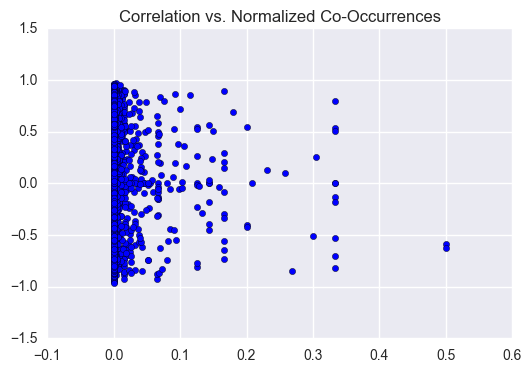

In [29]:
plt.scatter(cooccur.values[:,2], corr.values[:,2])
plt.title('Correlation vs. Normalized Co-Occurrences')
plt.show;

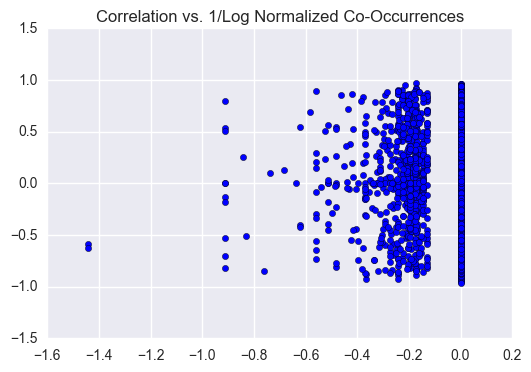

In [14]:
plt.scatter([float(1)/np.log(x) for x in cooccur.values[:,2]], corr.values[:,2])
plt.title('Correlation vs. 1/Log Normalized Co-Occurrences')
plt.show;

In [30]:
to_drop = []
for row_index in cooccur.index:
    if cooccur.value[row_index] == 0:
        to_drop.append(row_index)
cooccur.drop(to_drop, inplace=True)
corr.drop(to_drop, inplace=True)

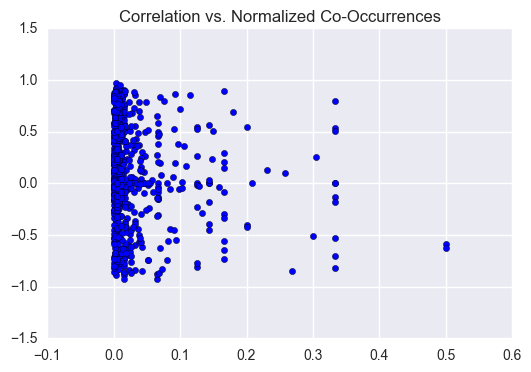

In [31]:
plt.scatter(cooccur.values[:,2], corr.values[:,2])
plt.title('Correlation vs. Normalized Co-Occurrences')
plt.show;

In [32]:
from sklearn.linear_model import LinearRegression
model0 = LinearRegression()
model1 = LinearRegression()

In [33]:
model0.fit(cooccur.values[:10000,2].reshape(-1, 1), corr.values[:10000,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
model0.score(cooccur.values[10001:,2].reshape(-1, 1), corr.values[10001:,2])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.